In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [3]:
#https://www.inegi.org.mx/programas/enigh/nc/2018/default.html#Microdatos
path = 'top50.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0          50 non-null int64
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [5]:
df.shape

(50, 14)

In [6]:
df.shape[0]

50

In [7]:
df.shape[1]

14

In [8]:
df.columns.values.tolist()

['Unnamed: 0',
 'Track.Name',
 'Artist.Name',
 'Genre',
 'Beats.Per.Minute',
 'Energy',
 'Danceability',
 'Loudness..dB..',
 'Liveness',
 'Valence.',
 'Length.',
 'Acousticness..',
 'Speechiness.',
 'Popularity']

In [9]:
df.dtypes

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [10]:
df.isnull().any().any()

False

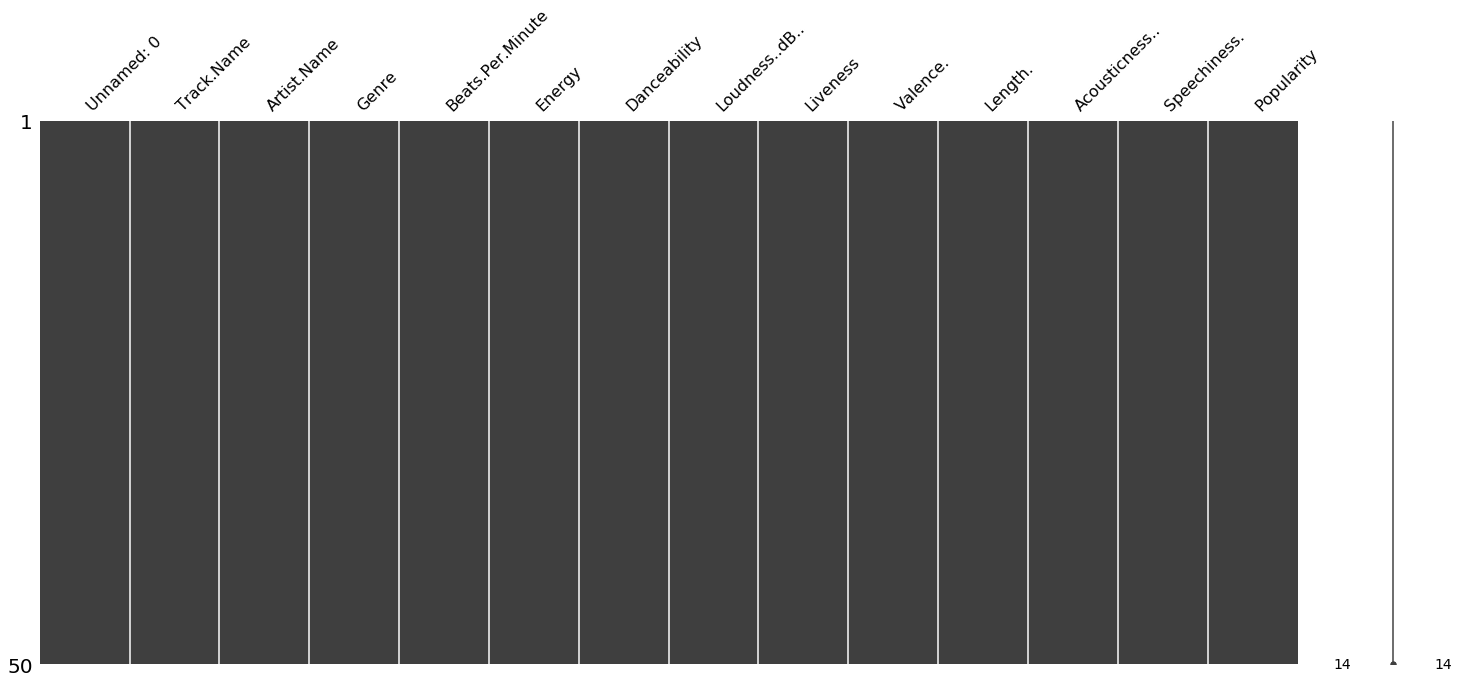

In [11]:
msno.matrix(df)

In [12]:
df.replace({' ': np.nan}, inplace=True)

In [13]:
df.isnull().any().any()

False

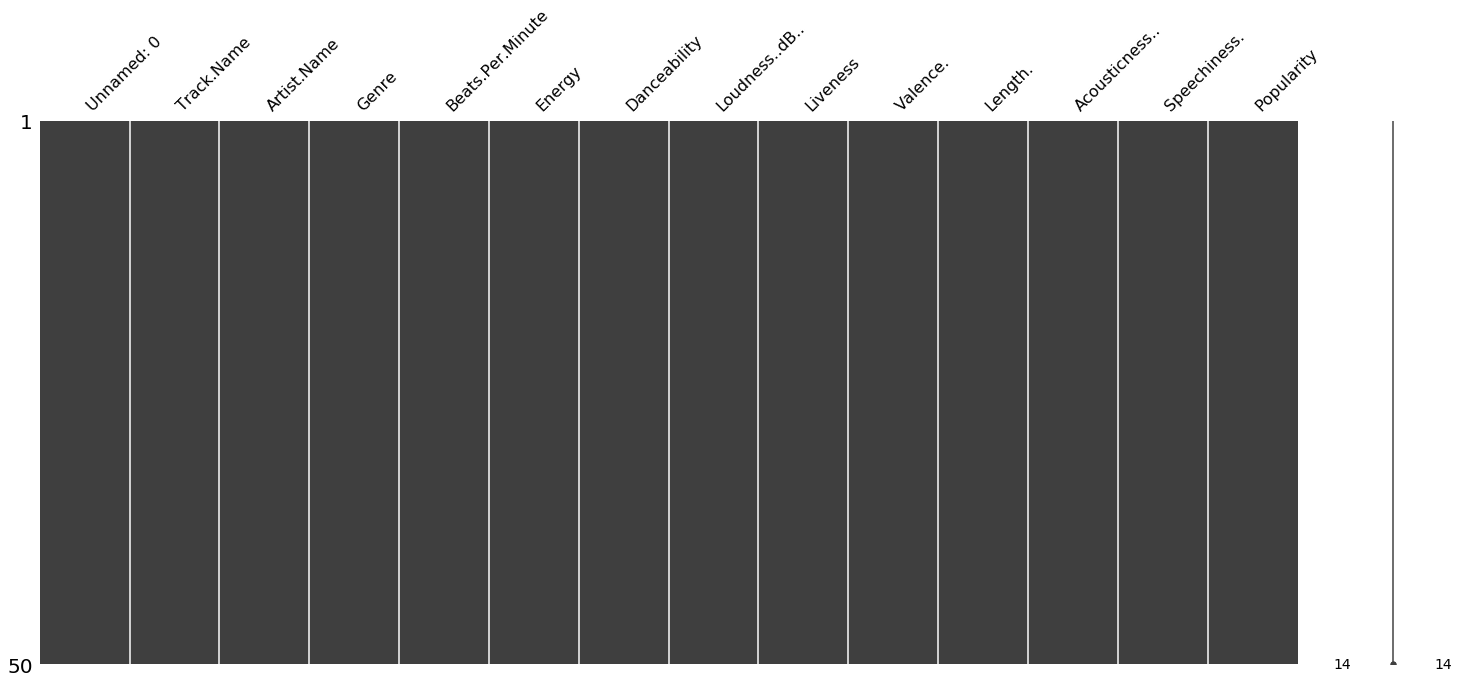

In [14]:
msno.matrix(df)

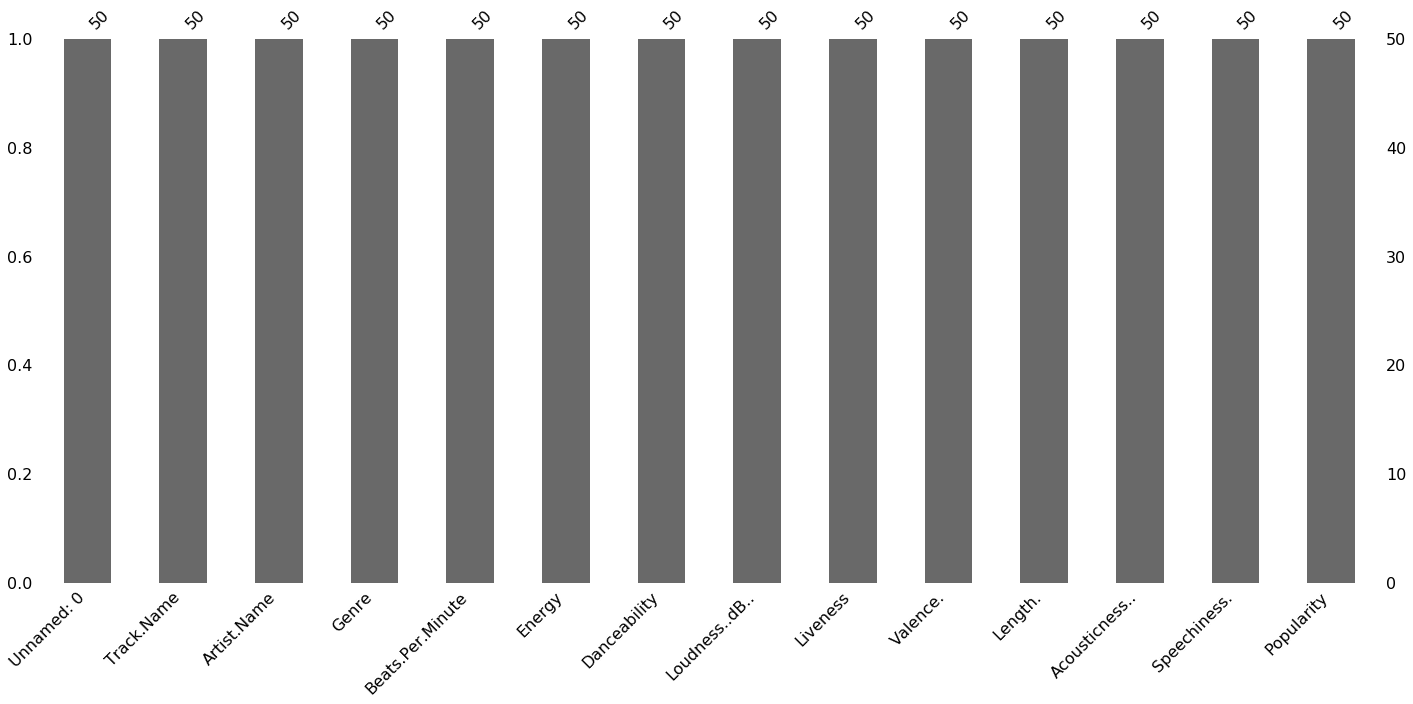

In [15]:
msno.bar(df)

In [16]:
df.columns[df.isnull().any()].tolist()

[]

In [17]:
df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [18]:
df.loc[[0]]

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79


In [19]:
df.loc[30:33]

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
30,31,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84
31,32,7 rings,Ariana Grande,dance pop,140,32,78,-11,9,33,179,59,33,89
32,33,0.958333333333333,Maluma,reggaeton,96,71,78,-5,9,68,176,22,28,89
33,34,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,98,59,80,-7,13,18,200,2,15,89


In [20]:
df.drop([0,24,5], axis=0).head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92


In [21]:
df.drop(df.index[1:5], axis=0).head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
11,12,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,dance pop,96,71,82,-4,15,38,185,28,7,86
12,13,Someone You Loved,Lewis Capaldi,pop,110,41,50,-6,11,45,182,75,3,88
13,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87


In [22]:
df[100:].head() #df.tail(-100) )

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity


In [23]:
df['Artist.Name'].values

array(['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran',
       'Post Malone', 'Ed Sheeran', 'Lil Tecca', 'Sam Smith', 'Lil Nas X',
       'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech',
       'Drake', 'Chris Brown', 'J Balvin', 'Post Malone', 'Y2K', 'Lizzo',
       'MEDUZA', 'Lil Nas X', 'Jhay Cortez', 'Lunay', 'Billie Eilish',
       'Shawn Mendes', 'Tones and I', 'Ali Gatie', 'Daddy Yankee',
       'J Balvin', 'The Chainsmokers', 'Ariana Grande', 'Maluma',
       'Young Thug', 'Katy Perry', 'Martin Garrix', 'Sech', 'Ed Sheeran',
       'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift', 'Lady Gaga',
       'Khalid', 'ROSALÍA', 'Marshmello', 'Nicky Jam', 'Marshmello',
       'The Chainsmokers', 'Ed Sheeran'], dtype=object)

In [24]:
df['Artist.Name'].unique()

array(['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran',
       'Post Malone', 'Lil Tecca', 'Sam Smith', 'Lil Nas X',
       'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech',
       'Drake', 'Chris Brown', 'J Balvin', 'Y2K', 'Lizzo', 'MEDUZA',
       'Jhay Cortez', 'Lunay', 'Tones and I', 'Ali Gatie', 'Daddy Yankee',
       'The Chainsmokers', 'Maluma', 'Young Thug', 'Katy Perry',
       'Martin Garrix', 'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift',
       'Lady Gaga', 'Khalid', 'ROSALÍA', 'Marshmello', 'Nicky Jam'],
      dtype=object)

In [25]:
df['Artist.Name'].value_counts()

Ed Sheeran          4
J Balvin            2
Sech                2
Marshmello          2
The Chainsmokers    2
Post Malone         2
Shawn Mendes        2
Lil Nas X           2
Ariana Grande       2
Billie Eilish       2
Maluma              1
ROSALÍA             1
MEDUZA              1
Lewis Capaldi       1
Kygo                1
Lizzo               1
Lunay               1
Drake               1
Taylor Swift        1
Nicky Jam           1
Lady Gaga           1
Jonas Brothers      1
Khalid              1
Young Thug          1
Ali Gatie           1
Jhay Cortez         1
DJ Snake            1
Bad Bunny           1
Lil Tecca           1
Y2K                 1
Tones and I         1
Lauv                1
Martin Garrix       1
Sam Smith           1
Chris Brown         1
Katy Perry          1
Daddy Yankee        1
Anuel AA            1
Name: Artist.Name, dtype: int64

In [26]:
df.agg(['count', 'size', 'nunique'])

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50,50,50,50,50,50,50,50,50,50,50,50,50,50
size,50,50,50,50,50,50,50,50,50,50,50,50,50,50
nunique,50,50,38,21,31,31,29,9,22,39,44,35,24,18


In [27]:
df.groupby('Artist.Name').agg(['count', 'size', 'nunique']).stack()

Unnamed: 0  Track.Name  Genre  Beats.Per.Minute  Energy  \
Artist.Name                                                                    
Ali Gatie   count             1           1      1                 1       1   
            size              1           1      1                 1       1   
            nunique           1           1      1                 1       1   
Anuel AA    count             1           1      1                 1       1   
            size              1           1      1                 1       1   
...                         ...         ...    ...               ...     ...   
Y2K         size              1           1      1                 1       1   
            nunique           1           1      1                 1       1   
Young Thug  count             1           1      1                 1       1   
            size              1           1      1                 1       1   
            nunique           1           1      1                 1       1   

                     Danceability  Loudness..dB..  Liveness  Valence.  \
Artist.Name                                                             
Ali Gatie   count               1               1         1         1   
            size                1               1         1         1   
            nunique             1               1         1         1   
Anuel AA    count               1               1         1         1   
            size                1               1         1         1   
...                           ...             ...       ...       ...   
Y2K         size                1               1         1         1   
            nunique             1               1         1         1   
Young Thug  count               1               1         1         1   
            size                1               1         1         1   
            nunique             1               1         1         1   

                     Length.  Acousticness..  Speechiness.  Popularity  
Artist.Name                                                             
Ali Gatie   count          1               1             1           1  
            size           1               1             1           1  
            nunique        1               1             1           1  
Anuel AA    count          1               1             1           1  
            size           1               1             1           1  
...                      ...             ...           ...         ...  
Y2K         size           1               1             1           1  
            nunique        1               1             1           1  
Young Thug  count          1               1             1           1  
            size           1               1             1           1  
            nunique        1               1             1           1  

[114 rows x 13 columns]

In [28]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
27,28,It's You,Ali Gatie,canadian hip hop,96,46,73,-7,19,40,213,37,3,89
35,36,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,big room,114,72,66,-7,14,32,164,18,6,89


In [29]:
df.shape

(50, 14)

In [30]:
df_sample.shape

(2, 14)

In [31]:
df_dropped = df.dropna(subset=['Length.'])
df_dropped.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [32]:
df_dropped.shape

(50, 14)

In [33]:
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [34]:
df_copy.shape

(50, 14)

In [35]:
df_dropped['Beats.Per.Minute'].dtype

dtype('int64')

In [36]:
df_dropped['Beats.Per.Minute'].mean() 

120.06

In [37]:
df_copy['Beats.Per.Minute'].fillna(value=np.round(df['Beats.Per.Minute'].mean(),decimals=0), inplace=True)

In [38]:
df_copy.agg(['count', 'size', 'nunique'])

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50,50,50,50,50,50,50,50,50,50,50,50,50,50
size,50,50,50,50,50,50,50,50,50,50,50,50,50,50
nunique,50,50,38,21,31,31,29,9,22,39,44,35,24,18


In [39]:
list(df['Artist.Name'].unique())

['Shawn Mendes',
 'Anuel AA',
 'Ariana Grande',
 'Ed Sheeran',
 'Post Malone',
 'Lil Tecca',
 'Sam Smith',
 'Lil Nas X',
 'Billie Eilish',
 'Bad Bunny',
 'DJ Snake',
 'Lewis Capaldi',
 'Sech',
 'Drake',
 'Chris Brown',
 'J Balvin',
 'Y2K',
 'Lizzo',
 'MEDUZA',
 'Jhay Cortez',
 'Lunay',
 'Tones and I',
 'Ali Gatie',
 'Daddy Yankee',
 'The Chainsmokers',
 'Maluma',
 'Young Thug',
 'Katy Perry',
 'Martin Garrix',
 'Jonas Brothers',
 'Lauv',
 'Kygo',
 'Taylor Swift',
 'Lady Gaga',
 'Khalid',
 'ROSALÍA',
 'Marshmello',
 'Nicky Jam']

In [40]:
keys = list(df['Artist.Name'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'Shawn Mendes': 1,
 'Anuel AA': 2,
 'Ariana Grande': 3,
 'Ed Sheeran': 4,
 'Post Malone': 5,
 'Lil Tecca': 6,
 'Sam Smith': 7}

In [41]:
df_copy['Artist.Name'] = df['Artist.Name'].map(act)
df_copy.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,1.0,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,2.0,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),3.0,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),4.0,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),5.0,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [42]:
list(df_copy['Artist.Name'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan]

In [43]:
df_copy['Beats.Per.Minute'].mean()

120.06

In [44]:
df_copy['Beats.Per.Minute'][df_copy['Artist.Name'] == 6]

6    180
Name: Beats.Per.Minute, dtype: int64

In [45]:
df_copy['Beats.Per.Minute'][df_copy['Artist.Name'] == 6].mean()

180.0

In [46]:
df_copy.groupby(["Artist.Name", "Energy", "Valence.", "Popularity"]).count()

Unnamed: 0  Track.Name  Genre  \
Artist.Name Energy Valence. Popularity                                  
1.0         55     75       79                   1           1      1   
            82     87       70                   1           1      1   
2.0         81     61       92                   1           1      1   
3.0         32     33       89                   1           1      1   
            80     70       85                   1           1      1   
4.0         65     55       86                   1           1      1   
            68     84       84                   1           1      1   
            79     61       82                   1           1      1   
            82     91       87                   1           1      1   
5.0         48     91       91                   1           1      1   
            65     18       94                   1           1      1   
6.0         64     23       92                   1           1      1   
7.0         68     35       90                   1           1      1   

                                        Beats.Per.Minute  Danceability  \
Artist.Name Energy Valence. Popularity                                   
1.0         55     75       79                         1             1   
            82     87       70                         1             1   
2.0         81     61       92                         1             1   
3.0         32     33       89                         1             1   
            80     70       85                         1             1   
4.0         65     55       86                         1             1   
            68     84       84                         1             1   
            79     61       82                         1             1   
            82     91       87                         1             1   
5.0         48     91       91                         1             1   
            65     18       94                         1             1   
6.0         64     23       92                         1             1   
7.0         68     35       90                         1             1   

                                        Loudness..dB..  Liveness  Length.  \
Artist.Name Energy Valence. Popularity                                      
1.0         55     75       79                       1         1        1   
            82     87       70                       1         1        1   
2.0         81     61       92                       1         1        1   
3.0         32     33       89                       1         1        1   
            80     70       85                       1         1        1   
4.0         65     55       86                       1         1        1   
            68     84       84                       1         1        1   
            79     61       82                       1         1        1   
            82     91       87                       1         1        1   
5.0         48     91       91                       1         1        1   
            65     18       94                       1         1        1   
6.0         64     23       92                       1         1        1   
7.0         68     35       90                       1         1        1   

                                        Acousticness..  Speechiness.  
Artist.Name Energy Valence. Popularity                                
1.0         55     75       79                       1             1  
            82     87       70                       1             1  
2.0         81     61       92                       1             1  
3.0         32     33       89                       1             1  
            80     70       85                       1             1  
4.0         65     55       86                       1             1  
            68     84       84                       1             1  
            79     61       82        

In [47]:
df_copy.Popularity

0     79
1     92
2     85
3     86
4     94
5     84
6     92
7     90
8     87
9     95
10    93
11    86
12    88
13    87
14    92
15    82
16    90
17    91
18    88
19    91
20    91
21    91
22    83
23    91
24    89
25    70
26    83
27    89
28    91
29    89
30    84
31    89
32    89
33    89
34    89
35    89
36    91
37    87
38    80
39    78
40    88
41    90
42    87
43    84
44    88
45    88
46    88
47    88
48    88
49    82
Name: Popularity, dtype: int64

In [48]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
27,28,It's You,Ali Gatie,canadian hip hop,96,46,73,-7,19,40,213,37,3,89
35,36,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,big room,114,72,66,-7,14,32,164,18,6,89


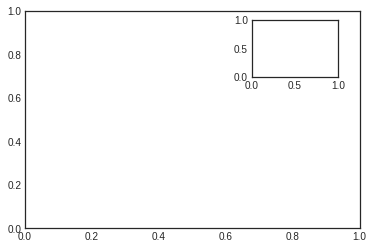

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

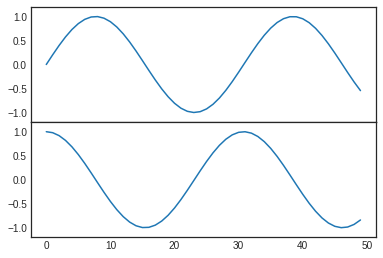

In [50]:
#The equivalent of this command within the object-oriented interface is fig.add_axes()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

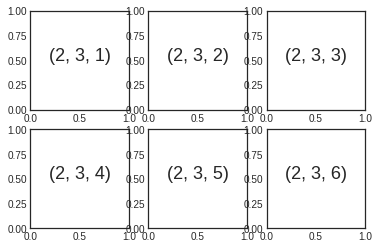

In [51]:
# The lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

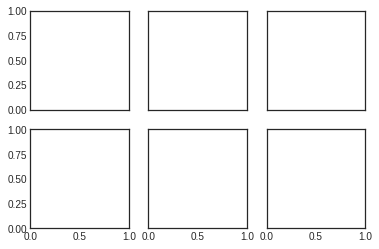

In [52]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

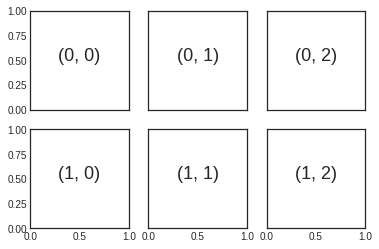

In [53]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

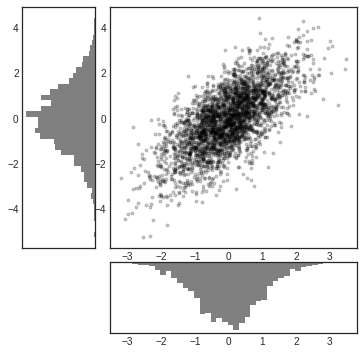

In [54]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

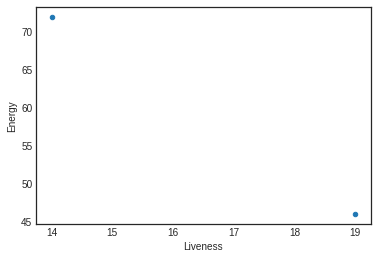

In [55]:
#figure.savefig('.../.jpeg')
#df_sample['ventas'] = dropna()
df_sample['Liveness'] = df_sample['Liveness'].astype('int64')

df_sample.plot(kind='scatter',x='Liveness',y='Energy')

Text(0.5, 1.0, 'Popularity and Liveness')

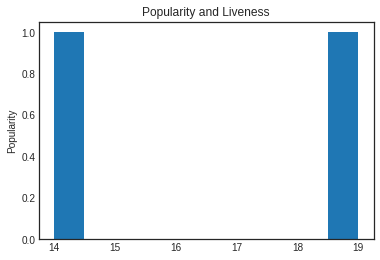

In [56]:
plt.hist(df_sample['Liveness'])
plt.ylabel('Popularity')
plt.title('Popularity and Liveness')

Text(0.5, 1.0, 'Box Plot of ventas count')

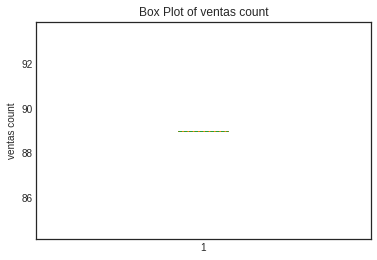

In [57]:
#plt.boxplot(df_sample['ventas'])
plt.boxplot(df_sample['Popularity'], showmeans=True, meanline=True)
plt.ylabel('ventas count')
plt.title('Box Plot of ventas count')